# Homework 4
B06201053 數學四 鄭心慈

Price a lookback put with the binomial tree model. The payoff function of the lookback
put is as follows.

$$
\text{Payoff}_{\tau}=\max(S_{max,\tau}−S_{\tau},0), \;\;\,\text{where} \; S_{max,\tau}=\max S_u, \,\text{for}\; u=0,\Delta t,2\Delta t,...,\tau.
$$

## Basic requirement (80 points)

(i) Implement the binomial tree model to price both European and American lookback
puts.

(ii) Implement the Monte Carlo simulation to price European lookback puts.

>Inputs: $S_t$, $r$, $q$, $\sigma$, $t$, $T$, $S_{max,t}$, $n$, number of simulations, number of repetitions.

>Outputs: Option values for both methods and 95% confidence interval for Monte Carlo simulation.

In [ ]:
import numpy as np

In [ ]:
### input

In [ ]:
S_t0=float(input('Please input S_t: '))

In [ ]:
r=float(input('Please input r: '))

In [ ]:
q=float(input('Please input q: '))

In [ ]:
sigma=float(input('Please input sigma: '))

In [ ]:
t0=float(input('Please input t: '))

In [ ]:
T=float(input('Please input T: '))

In [ ]:
S_max_t0=float(input('Please input S_max,t: '))

In [ ]:
n=int(input('Please input n: '))

In [ ]:
n_si=int(input('Please input number of simulations: '))

In [ ]:
n_re=int(input('Please input number of repetitions: '))

In [ ]:
### binomial tree model

In [ ]:
dt=(T-t0)/n
u=np.exp(sigma*np.sqrt(dt))
d=1/u
p=(np.exp((r-q)*dt)-d)/(u-d)

In [ ]:
import math

In [ ]:
### European option
def BT_lookback_E_option_price(S_t0, r, q, sigma, dt, S_max_t0, n):
    S_t=np.zeros((n+1, n+1))
    for i in range(n-1, n+1, 1):
        for j in range(0, i+1, 1):
            S_t[i,j]=S_t0*u**(i-j)*d**j
    if n%2: # n是奇數
        S_t[n-1,math.floor(n/2)]=S_t0
    else: # n是偶數
        S_t[n,math.floor(n/2)]=S_t0
    for i in range(n-2, -1, -1):
        for j in range(0, i+1, 1):
            S_t[i,j]=S_t[i+2,j+1]
    # forward-tracking method
    S_max=np.zeros((n+1, n+1, 2*n+2))
    n_S_max=np.zeros((n+1, n+1))
    S_max[0,0,0]=S_max_t0
    n_S_max[0,0]=1
    for i in range(1, n+1, 1):
        # j=0
        for k_1 in range(0, int(n_S_max[i-1,0]), 1):
            if S_max[i-1,0,k_1]>=S_t[i,0]:
                for k in range (0, int(n_S_max[i,0])+1, 1):
                    if S_max[i,0,k]>S_max[i-1,0,k_1]:
                        continue
                    if S_max[i,0,k]==S_max[i-1,0,k_1]:
                        break
                    if S_max[i,0,k]<S_max[i-1,0,k_1]:
                        for l in range(int(n_S_max[i,0]), k-1,-1):
                            S_max[i,0,l+1]=S_max[i,0,l]
                        S_max[i,0,k]=S_max[i-1,0,k_1]
                        n_S_max[i,0]+=1
                        break
            elif S_max[i-1,0,k_1]<S_t[i,0]:
                for k in range (0, int(n_S_max[i,0])+1, 1):
                    if S_max[i,0,k]>S_t[i,0]:
                        continue
                    if S_max[i,0,k]==S_t[i,0]:
                        break
                    if S_max[i,0,k]<S_t[i,0]:
                        for l in range(int(n_S_max[i,0]), k-1,-1):
                            S_max[i,0,l+1]=S_max[i,0,l]
                        S_max[i,0,k]=S_t[i,0]
                        n_S_max[i,0]+=1
                        break
                break
        for j in range(1, i, 1):
            for k_1 in range(0, int(n_S_max[i-1,j-1]), 1):
                if S_max[i-1,j-1,k_1]>=S_t[i,j]:
                    for k in range (0, int(n_S_max[i,j])+1, 1):
                        if S_max[i,j,k]>S_max[i-1,j-1,k_1]:
                            continue
                        if S_max[i,j,k]==S_max[i-1,j-1,k_1]:
                            break
                        if S_max[i,j,k]<S_max[i-1,j-1,k_1]:
                            for l in range(int(n_S_max[i,j]), k-1,-1):
                                S_max[i,j,l+1]=S_max[i,j,l]
                            S_max[i,j,k]=S_max[i-1,j-1,k_1]
                            n_S_max[i,j]+=1
                            break
                elif S_max[i-1,j-1,k_1]<S_t[i,j]:
                    for k in range (0, int(n_S_max[i,0])+1, 1):
                        if S_max[i,j,k]>S_t[i,j]:
                            continue
                        if S_max[i,j,k]==S_t[i,j]:
                            break
                        if S_max[i,j,k]<S_t[i,j]:
                            for l in range(int(n_S_max[i,j]), k-1,-1):
                                S_max[i,j,l+1]=S_max[i,j,l]
                            S_max[i,j,k]=S_t[i,j]
                            n_S_max[i,j]+=1
                            break
                    break
            for k_1 in range(0, int(n_S_max[i-1,j]), 1):
                if S_max[i-1,j,k_1]>=S_t[i,j]:
                    for k in range (0, int(n_S_max[i,j])+1, 1):
                        if S_max[i,j,k]>S_max[i-1,j,k_1]:
                            continue
                        if S_max[i,j,k]==S_max[i-1,j,k_1]:
                            break
                        if S_max[i,j,k]<S_max[i-1,j,k_1]:
                            for l in range(int(n_S_max[i,j]), k-1,-1):
                                S_max[i,j,l+1]=S_max[i,j,l]
                            S_max[i,j,k]=S_max[i-1,j,k_1]
                            n_S_max[i,j]+=1
                            break
                elif S_max[i-1,j,k_1]<S_t[i,j]:
                    for k in range (0, int(n_S_max[i,j])+1, 1):
                        if S_max[i,j,k]>S_t[i,j]:
                            continue
                        if S_max[i,j,k]==S_t[i,j]:
                            break
                        if S_max[i,j,k]<S_t[i,j]:
                            for l in range(int(n_S_max[i,j]), k-1,-1):
                                S_max[i,j,l+1]=S_max[i,j,l]
                            S_max[i,j,k]=S_t[i,j]
                            n_S_max[i,j]+=1
                            break
                    break
        # j=i
        for k_1 in range(0, int(n_S_max[i-1,i-1]), 1):
            if S_max[i-1,i-1,k_1]>=S_t[i,i]:
                for k in range (0, int(n_S_max[i,i])+1, 1):
                    if S_max[i,i,k]>S_max[i-1,i-1,k_1]:
                        continue
                    if S_max[i,i,k]==S_max[i-1,i-1,k_1]:
                        break
                    if S_max[i,i,k]<S_max[i-1,i-1,k_1]:
                        for l in range(int(n_S_max[i,i]), k-1,-1):
                            S_max[i,i,l+1]=S_max[i,i,l]
                        S_max[i,i,k]=S_max[i-1,i-1,k_1]
                        n_S_max[i,i]+=1
                        break
            elif S_max[i-1,i-1,k_1]<S_t[i,i]:
                for k in range (0, int(n_S_max[i,i])+1, 1):
                    if S_max[i,i,k]>S_t[i,i]:
                        continue
                    if S_max[i,i,k]==S_t[i,i]:
                        break
                    if S_max[i,i,k]<S_t[i,i]:
                        for l in range(int(n_S_max[i,i]), k-1,-1):
                            S_max[i,i,l+1]=S_max[i,i,l]
                        S_max[i,i,k]=S_t[i,i]
                        n_S_max[i,i]+=1
                        break
                break
    put=np.zeros((n+1, n+1, 2*n+2))
    # i=n
    for j in range(0, n+1, 1):
        for k in range(0, int(n_S_max[n,j]), 1):
            put[n,j,k]=S_max[n,j,k]-S_t[n,j]
    # backward induction
    for i in range(n-1, -1, -1):
        for j in range(0, i+1, 1):
            sign_1=0
            sign_2=0
            for k in range(0, int(n_S_max[i,j]), 1):
                for k_1 in range(sign_1, int(n_S_max[i+1,j])+1, 1):
                    if S_max[i,j,k]<S_max[i+1,j,k_1]:
                        continue
                    elif S_max[i,j,k]==S_max[i+1,j,k_1]:
                        put[i,j,k]+=np.exp(-r*dt)*p*put[i+1,j,k_1]
                        sign_1=k_1
                        break
                    elif S_max[i,j,k]>S_max[i+1,j,k_1]:
                        for k_1_1 in range(k_1, -1, -1):
                            if S_max[i+1,j,k_1_1]==S_t[i+1,j]:
                                put[i,j,k]+=np.exp(-r*dt)*p*put[i+1,j,k_1_1]
                                sign_1=k_1_1
                                break
                            else:
                                continue
                        break
                for k_2 in range(sign_2, int(n_S_max[i+1,j+1]), 1):
                    if S_max[i,j,k]==S_max[i+1,j+1,k_2]:
                        put[i,j,k]+=np.exp(-r*dt)*(1-p)*put[i+1,j+1,k_2]
                        sign_2=k_2
                        break
    return put[0,0,0]

print('The option value is', BT_lookback_E_option_price(S_t0, r, q, sigma, dt, S_max_t0, n))

In [ ]:
### American option
def BT_lookback_A_option_price(S_t0, r, q, sigma, dt, S_max_t0, n):
    S_t=np.zeros((n+1, n+1))
    for i in range(n-1, n+1, 1):
        for j in range(0, i+1, 1):
            S_t[i,j]=S_t0*u**(i-j)*d**j
    if n%2: # n是奇數
        S_t[n-1,math.floor(n/2)]=S_t0
    else: # n是偶數
        S_t[n,math.floor(n/2)]=S_t0
    for i in range(n-2, -1, -1):
        for j in range(0, i+1, 1):
            S_t[i,j]=S_t[i+2,j+1]
    # forward-tracking method
    S_max=np.zeros((n+1, n+1, 2*n+2))
    n_S_max=np.zeros((n+1, n+1))
    S_max[0,0,0]=S_max_t0
    n_S_max[0,0]=1
    for i in range(1, n+1, 1):
        # j=0
        for k_1 in range(0, int(n_S_max[i-1,0]), 1):
            if S_max[i-1,0,k_1]>=S_t[i,0]:
                for k in range (0, int(n_S_max[i,0])+1, 1):
                    if S_max[i,0,k]>S_max[i-1,0,k_1]:
                        continue
                    if S_max[i,0,k]==S_max[i-1,0,k_1]:
                        break
                    if S_max[i,0,k]<S_max[i-1,0,k_1]:
                        for l in range(int(n_S_max[i,0]), k-1,-1):
                            S_max[i,0,l+1]=S_max[i,0,l]
                        S_max[i,0,k]=S_max[i-1,0,k_1]
                        n_S_max[i,0]+=1
                        break
            elif S_max[i-1,0,k_1]<S_t[i,0]:
                for k in range (0, int(n_S_max[i,0])+1, 1):
                    if S_max[i,0,k]>S_t[i,0]:
                        continue
                    if S_max[i,0,k]==S_t[i,0]:
                        break
                    if S_max[i,0,k]<S_t[i,0]:
                        for l in range(int(n_S_max[i,0]), k-1,-1):
                            S_max[i,0,l+1]=S_max[i,0,l]
                        S_max[i,0,k]=S_t[i,0]
                        n_S_max[i,0]+=1
                        break
                break
        for j in range(1, i, 1):
            for k_1 in range(0, int(n_S_max[i-1,j-1]), 1):
                if S_max[i-1,j-1,k_1]>=S_t[i,j]:
                    for k in range (0, int(n_S_max[i,j])+1, 1):
                        if S_max[i,j,k]>S_max[i-1,j-1,k_1]:
                            continue
                        if S_max[i,j,k]==S_max[i-1,j-1,k_1]:
                            break
                        if S_max[i,j,k]<S_max[i-1,j-1,k_1]:
                            for l in range(int(n_S_max[i,j]), k-1,-1):
                                S_max[i,j,l+1]=S_max[i,j,l]
                            S_max[i,j,k]=S_max[i-1,j-1,k_1]
                            n_S_max[i,j]+=1
                            break
                elif S_max[i-1,j-1,k_1]<S_t[i,j]:
                    for k in range (0, int(n_S_max[i,0])+1, 1):
                        if S_max[i,j,k]>S_t[i,j]:
                            continue
                        if S_max[i,j,k]==S_t[i,j]:
                            break
                        if S_max[i,j,k]<S_t[i,j]:
                            for l in range(int(n_S_max[i,j]), k-1,-1):
                                S_max[i,j,l+1]=S_max[i,j,l]
                            S_max[i,j,k]=S_t[i,j]
                            n_S_max[i,j]+=1
                            break
                    break
            for k_1 in range(0, int(n_S_max[i-1,j]), 1):
                if S_max[i-1,j,k_1]>=S_t[i,j]:
                    for k in range (0, int(n_S_max[i,j])+1, 1):
                        if S_max[i,j,k]>S_max[i-1,j,k_1]:
                            continue
                        if S_max[i,j,k]==S_max[i-1,j,k_1]:
                            break
                        if S_max[i,j,k]<S_max[i-1,j,k_1]:
                            for l in range(int(n_S_max[i,j]), k-1,-1):
                                S_max[i,j,l+1]=S_max[i,j,l]
                            S_max[i,j,k]=S_max[i-1,j,k_1]
                            n_S_max[i,j]+=1
                            break
                elif S_max[i-1,j,k_1]<S_t[i,j]:
                    for k in range (0, int(n_S_max[i,j])+1, 1):
                        if S_max[i,j,k]>S_t[i,j]:
                            continue
                        if S_max[i,j,k]==S_t[i,j]:
                            break
                        if S_max[i,j,k]<S_t[i,j]:
                            for l in range(int(n_S_max[i,j]), k-1,-1):
                                S_max[i,j,l+1]=S_max[i,j,l]
                            S_max[i,j,k]=S_t[i,j]
                            n_S_max[i,j]+=1
                            break
                    break
        # j=i
        for k_1 in range(0, int(n_S_max[i-1,i-1]), 1):
            if S_max[i-1,i-1,k_1]>=S_t[i,i]:
                for k in range (0, int(n_S_max[i,i])+1, 1):
                    if S_max[i,i,k]>S_max[i-1,i-1,k_1]:
                        continue
                    if S_max[i,i,k]==S_max[i-1,i-1,k_1]:
                        break
                    if S_max[i,i,k]<S_max[i-1,i-1,k_1]:
                        for l in range(int(n_S_max[i,i]), k-1,-1):
                            S_max[i,i,l+1]=S_max[i,i,l]
                        S_max[i,i,k]=S_max[i-1,i-1,k_1]
                        n_S_max[i,i]+=1
                        break
            elif S_max[i-1,i-1,k_1]<S_t[i,i]:
                for k in range (0, int(n_S_max[i,i])+1, 1):
                    if S_max[i,i,k]>S_t[i,i]:
                        continue
                    if S_max[i,i,k]==S_t[i,i]:
                        break
                    if S_max[i,i,k]<S_t[i,i]:
                        for l in range(int(n_S_max[i,i]), k-1,-1):
                            S_max[i,i,l+1]=S_max[i,i,l]
                        S_max[i,i,k]=S_t[i,i]
                        n_S_max[i,i]+=1
                        break
                break
    put=np.zeros((n+1, n+1, 2*n+2))
    # i=n
    for j in range(0, n+1, 1):
        for k in range(0, int(n_S_max[n,j]), 1):
            put[n,j,k]=S_max[n,j,k]-S_t[n,j]
    # backward induction
    for i in range(n-1, -1, -1):
        for j in range(0, i+1, 1):
            sign_1=0
            sign_2=0
            for k in range(0, int(n_S_max[i,j]), 1):
                for k_1 in range(sign_1, int(n_S_max[i+1,j])+1, 1):
                    if S_max[i,j,k]<S_max[i+1,j,k_1]:
                        continue
                    elif S_max[i,j,k]==S_max[i+1,j,k_1]:
                        put[i,j,k]+=np.exp(-r*dt)*p*put[i+1,j,k_1]
                        sign_1=k_1
                        break
                    elif S_max[i,j,k]>S_max[i+1,j,k_1]:
                        for k_1_1 in range(k_1, -1, -1):
                            if S_max[i+1,j,k_1_1]==S_t[i+1,j]:
                                put[i,j,k]+=np.exp(-r*dt)*p*put[i+1,j,k_1_1]
                                sign_1=k_1_1
                                break
                            else:
                                continue
                        break
                for k_2 in range(sign_2, int(n_S_max[i+1,j+1]), 1):
                    if S_max[i,j,k]==S_max[i+1,j+1,k_2]:
                        put[i,j,k]+=np.exp(-r*dt)*(1-p)*put[i+1,j+1,k_2]
                        sign_2=k_2
                        break
                put[i,j,k]=max(put[i,j,k], S_max[i,j,k]-S_t[i,j])
    return put[0,0,0]

print('The option value is',BT_lookback_A_option_price(S_t0, r, q, sigma, dt, S_max_t0, n))

In [ ]:
### Monte Carlo simulation

In [ ]:
### European option
def MC_lookback_E_option_price(S_t0, r, q, sigma, t0, T, S_max_t0, n, n_si):
    dt=(T-t0)/n
    S_t=np.zeros((n_si,n+1))
    for i in range(0, n_si, 1):
        S_t[i,0]=S_t0
        for j in range(0, n, 1):
            S_t[i,j+1]=np.exp(np.random.normal(np.log(S_t[i,j])+(r-q-sigma**2/2)*dt, np.sqrt(sigma**2*dt)))
    payoff=np.zeros(n_si)
    for i in range(0, n_si, 1):
        payoff[i]=max(max(max(S_t[i]),S_max_t0)-S_t[i,n],0)
    price=np.exp(-r*T)*np.mean(payoff)
    return price

sample=np.zeros(n_re)
for i in range(0, n_re, 1):
    sample[i]=MC_lookback_E_option_price(S_t0, r, q, sigma, t0, T, S_max_t0, n, n_si)

print('The option value is', np.mean(sample))
print('The 95% confidence interval is','[', np.mean(sample)-2*np.std(sample), ',', np.mean(sample)+2*np.std(sample), ']')

## Bonus 1 (5 points)

Based on the same binomial tree framework, devise and implement a quick way to determine the $S_{max}$ list for each node.

In [ ]:
dt=(T-t0)/n
u=np.exp(sigma*np.sqrt(dt))
d=1/u
p=(np.exp((r-q)*dt)-d)/(u-d)

In [ ]:
import math

In [ ]:
### European option
def BT_lookback_E_option_price_1(S_t0, r, q, sigma, dt, S_max_t0, n):
    S_t=np.zeros((n+1, n+1))
    for i in range(n-1, n+1, 1):
        for j in range(0, i+1, 1):
            S_t[i,j]=S_t0*u**(i-j)*d**j
    if n%2: # n是奇數
        S_t[n-1,math.floor(n/2)]=S_t0
    else: # n是偶數
        S_t[n,math.floor(n/2)]=S_t0
    for i in range(n-2, -1, -1):
        for j in range(0, i+1, 1):
            S_t[i,j]=S_t[i+2,j+1]
    # combinatorial method
    S_max_1=np.zeros((n+1, n+1, math.ceil((n+1)/2)))
    n_S_max=np.zeros((n+1, n+1))
    S_max_1[0,0,0]=S_max_t0
    for i in range(0, n+1, 1):
        for j in range(0, math.ceil((i+1)/2), 1):
            for k in range(j, -1, -1):
                if S_t[i-k,j-k]>=S_max_t0:
                    S_max_1[i,j,j-k]=S_t[i-k,j-k]
                    n_S_max[i,j]+=1
                else:
                    S_max_1[i,j,j-k]=S_max_t0
                    n_S_max[i,j]+=1
                    break
        for j in range(math.ceil((i+1)/2), i+1, 1):
            for k in range(0, i-j+1, 1):
                if S_t[i-j-k,0]>=S_max_t0:
                    S_max_1[i,j,k]=S_t[i-j-k,0]
                    n_S_max[i,j]+=1
                else:
                    S_max_1[i,j,k]=S_max_t0
                    n_S_max[i,j]+=1
                    break
    put=np.zeros((n+1, n+1, 2*n+2))
    # i=n
    for j in range(0, n+1, 1):
        for k in range(0, int(n_S_max[n,j]), 1):
            put[n,j,k]=S_max_1[n,j,k]-S_t[n,j]
    # backward induction
    for i in range(n-1, -1, -1):
        for j in range(0, i+1, 1):
            sign_1=0
            sign_2=0
            for k in range(0, int(n_S_max[i,j]), 1):
                for k_1 in range(sign_1, int(n_S_max[i+1,j])+1, 1):
                    if S_max_1[i,j,k]<S_max_1[i+1,j,k_1]:
                        continue
                    elif S_max_1[i,j,k]==S_max_1[i+1,j,k_1]:
                        put[i,j,k]+=np.exp(-r*dt)*p*put[i+1,j,k_1]
                        sign_1=k_1
                        break
                    elif S_max_1[i,j,k]>S_max_1[i+1,j,k_1]:
                        for k_1_1 in range(k_1, -1, -1):
                            if S_max_1[i+1,j,k_1_1]==S_t[i+1,j]:
                                put[i,j,k]+=np.exp(-r*dt)*p*put[i+1,j,k_1_1]
                                sign_1=k_1_1
                                break
                            else:
                                continue
                        break
                for k_2 in range(sign_2, int(n_S_max[i+1,j+1]), 1):
                    if S_max_1[i,j,k]==S_max_1[i+1,j+1,k_2]:
                        put[i,j,k]+=np.exp(-r*dt)*(1-p)*put[i+1,j+1,k_2]
                        sign_2=k_2
                        break
    return put[0,0,0]

print('The option value is', BT_lookback_E_option_price_1(S_t0, r, q, sigma, dt, S_max_t0, n))

In [ ]:
### American option
def BT_lookback_A_option_price(S_t0, r, q, sigma, dt, S_max_t0, n):
    S_t=np.zeros((n+1, n+1))
    for i in range(n-1, n+1, 1):
        for j in range(0, i+1, 1):
            S_t[i,j]=S_t0*u**(i-j)*d**j
    if n%2: # n是奇數
        S_t[n-1,math.floor(n/2)]=S_t0
    else: # n是偶數
        S_t[n,math.floor(n/2)]=S_t0
    for i in range(n-2, -1, -1):
        for j in range(0, i+1, 1):
            S_t[i,j]=S_t[i+2,j+1]
    # combinatorial method
    S_max_1=np.zeros((n+1, n+1, math.ceil((n+1)/2)))
    n_S_max=np.zeros((n+1, n+1))
    S_max_1[0,0,0]=S_max_t0
    for i in range(0, n+1, 1):
        for j in range(0, math.ceil((i+1)/2), 1):
            for k in range(j, -1, -1):
                if S_t[i-k,j-k]>=S_max_t0:
                    S_max_1[i,j,j-k]=S_t[i-k,j-k]
                    n_S_max[i,j]+=1
                else:
                    S_max_1[i,j,j-k]=S_max_t0
                    n_S_max[i,j]+=1
                    break
        for j in range(math.ceil((i+1)/2), i+1, 1):
            for k in range(0, i-j+1, 1):
                if S_t[i-j-k,0]>=S_max_t0:
                    S_max_1[i,j,k]=S_t[i-j-k,0]
                    n_S_max[i,j]+=1
                else:
                    S_max_1[i,j,k]=S_max_t0
                    n_S_max[i,j]+=1
                    break
    put=np.zeros((n+1, n+1, 2*n+2))
    # i=n
    for j in range(0, n+1, 1):
        for k in range(0, int(n_S_max[n,j]), 1):
            put[n,j,k]=S_max_1[n,j,k]-S_t[n,j]
    # backward induction
    for i in range(n-1, -1, -1):
        for j in range(0, i+1, 1):
            sign_1=0
            sign_2=0
            for k in range(0, int(n_S_max[i,j]), 1):
                for k_1 in range(sign_1, int(n_S_max[i+1,j])+1, 1):
                    if S_max_1[i,j,k]<S_max_1[i+1,j,k_1]:
                        continue
                    elif S_max_1[i,j,k]==S_max_1[i+1,j,k_1]:
                        put[i,j,k]+=np.exp(-r*dt)*p*put[i+1,j,k_1]
                        sign_1=k_1
                        break
                    elif S_max_1[i,j,k]>S_max_1[i+1,j,k_1]:
                        for k_1_1 in range(k_1, -1, -1):
                            if S_max_1[i+1,j,k_1_1]==S_t[i+1,j]:
                                put[i,j,k]+=np.exp(-r*dt)*p*put[i+1,j,k_1_1]
                                sign_1=k_1_1
                                break
                            else:
                                continue
                        break
                for k_2 in range(sign_2, int(n_S_max[i+1,j+1]), 1):
                    if S_max_1[i,j,k]==S_max_1[i+1,j+1,k_2]:
                        put[i,j,k]+=np.exp(-r*dt)*(1-p)*put[i+1,j+1,k_2]
                        sign_2=k_2
                        break
                put[i,j,k]=max(put[i,j,k], S_max_1[i,j,k]-S_t[i,j])
    return put[0,0,0]

print('The option value is',BT_lookback_A_option_price(S_t0, r, q, sigma, dt, S_max_t0, n))

## Bonus 2 (10 points)

Implement the method in Cheuk and Vorst (1997) to price European and American
lookback puts.

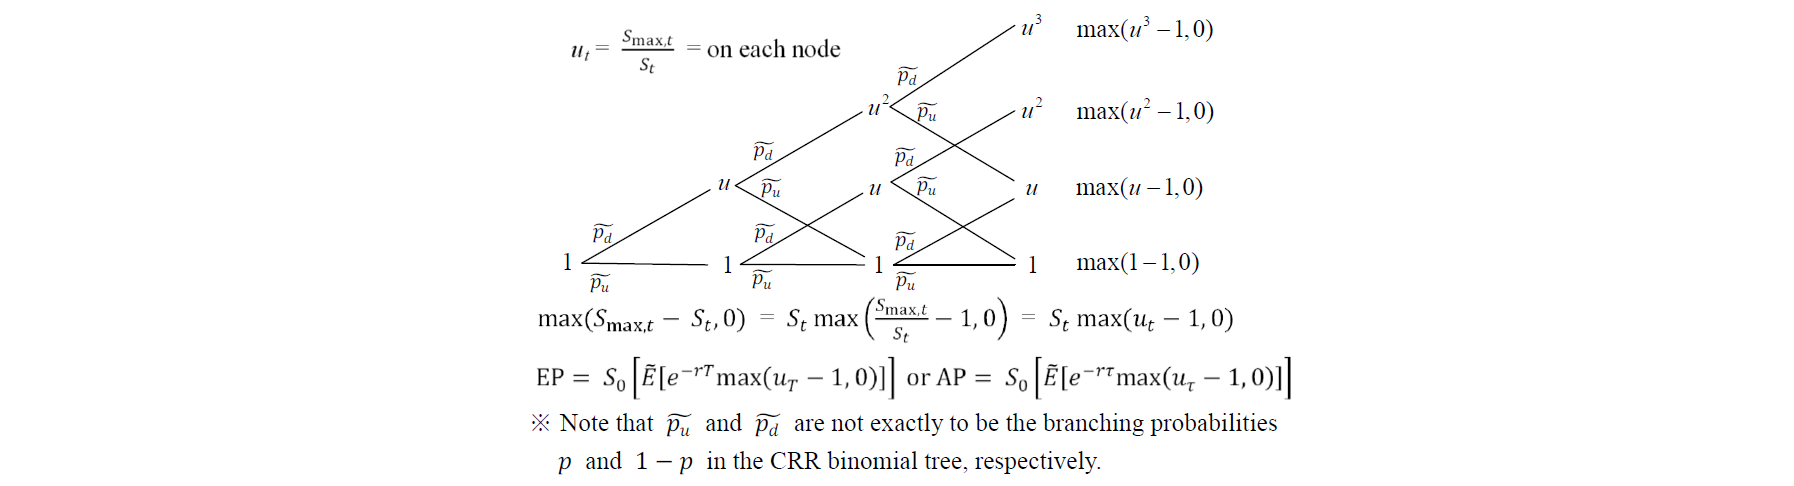

In [ ]:
dt=(T-t0)/n
u=np.exp(sigma*np.sqrt(dt))
d=1/u
p=(np.exp((r-q)*dt)-d)/(u-d)

In [ ]:
p_d=(1-p)*d
p_u=p*u

In [ ]:
### European option
def CV_lookback_E_option_price(S_t0, r, q, sigma, dt, n):
    u_t=np.zeros((n+1, n+1))
    for i in range(0, n+1, 1):
        u_t[i,0]=1
        for j in range(1, i+1, 1):
            u_t[i,j]=u**j
    payoff=np.zeros((n+1, n+1))
    for j in range(0, n+1, 1):
        payoff[n,j]=max(u_t[n,j]-1,0)
    for i in range(n-1, -1, -1):
        payoff[i,0]=np.exp(-r*dt)*(p_u*payoff[i+1,0]+p_d*payoff[i+1,1])
        for j in range(1, i+1, 1):
            payoff[i,j]=np.exp(-r*dt)*(p_u*payoff[i+1,j-1]+p_d*payoff[i+1,j+1])
    return S_t0*payoff[0,0]

print('The option value is',CV_lookback_E_option_price(S_t0, r, q, sigma, dt, n))

In [ ]:
### American option
def CV_lookback_A_option_price(S_t0, r, q, sigma, dt, n):
    u_t=np.zeros((n+1, n+1))
    for i in range(0, n+1, 1):
        u_t[i,0]=1
        for j in range(1, i+1, 1):
            u_t[i,j]=u**j
    payoff=np.zeros((n+1, n+1))
    for j in range(0, n+1, 1):
        payoff[n,j]=max(u_t[n,j]-1,0)
    for i in range(n-1, -1, -1):
        payoff[i,0]=max(np.exp(-r*dt)*(p_u*payoff[i+1,0]+p_d*payoff[i+1,1]), u_t[i,0]-1)
        for j in range(1, i+1, 1):
            payoff[i,j]=max(np.exp(-r*dt)*(p_u*payoff[i+1,j-1]+p_d*payoff[i+1,j+1]), u_t[i,j]-1)
    return S_t0*payoff[0,0]

print('The option value is',CV_lookback_A_option_price(S_t0, r, q, sigma, dt, n))

## Reference

Cheuk and Vorst (1997), “Currency lookback options and observation frequency: a binomial approach,” _Journal of International Money and Finance_ 16, pp. 173–187.